In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL

import skimage.transform
import skimage.util
     

In [7]:
### Settings

# Location of image
IMG_PATH = "../data/raw/electronic-components-bmp/capacitor/0.bmp"

# You are welcome to change the seed to get different augmentation effects
SEED = 42
random.seed(SEED)

In [8]:
### Load image as Numpy array

# Open image
img = PIL.Image.open(IMG_PATH)

# Convert the image to a Numpy array, optionally invert, and append to X
img = np.asarray(img)

In [9]:
### Get height and width of image
height = img.shape[0]
width = img.shape[1]

(96, 96, 3)
First channel:
[[156 156 156 ... 164 164 164]
 [156 156 156 ... 164 164 164]
 [156 156 156 ... 164 164 164]
 ...
 [131 131 131 ... 139 139 139]
 [131 131 131 ... 139 139 139]
 [131 131 131 ... 139 139 139]]


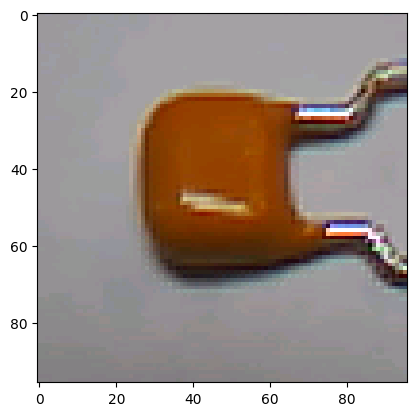

In [10]:
### View the image

# Print part of image
print(img.shape)
print("First channel:")
print(img[:,:,0])

# Display image from array
plt.imshow(img, vmin=0, vmax=255)

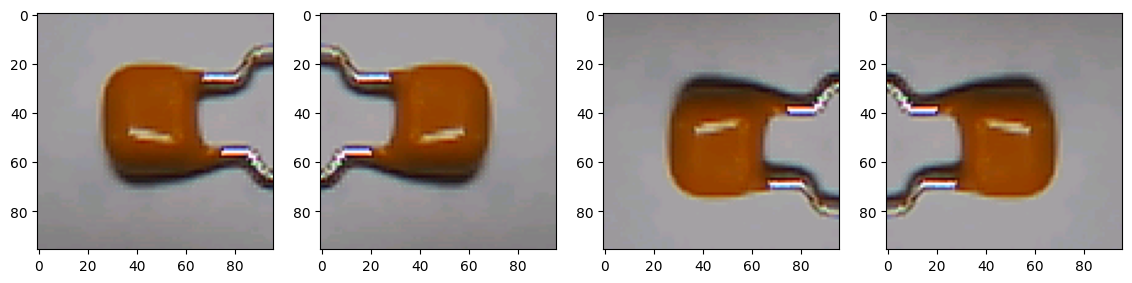

In [11]:
### Flip 

# Create three separate flips
flip_1 = np.fliplr(img)
flip_2 = np.flipud(img)
flip_3 = np.flipud(np.fliplr(img))

# Show the original and the transforms
figs, axs = plt.subplots(1, 4, figsize=(14, 14))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(flip_1, vmin=0, vmax=255)
axs[2].imshow(flip_2, vmin=0, vmax=255)
axs[3].imshow(flip_3, vmin=0, vmax=255)

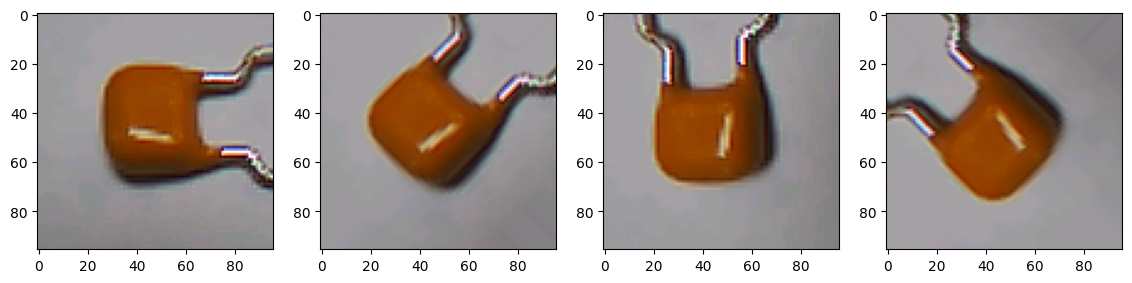

In [12]:
### Rotate

# Create 3 rotations at the 45, 90, 135. Note that rotate() normalizes values, so we need to keep
# them in the 0..255 integer range.
rot_1 = skimage.transform.rotate(img, angle=45, mode='edge', preserve_range=True).astype(np.uint8)
rot_2 = skimage.transform.rotate(img, angle=90, mode='edge', preserve_range=True).astype(np.uint8)
rot_3 = skimage.transform.rotate(img, angle=135, mode='edge', preserve_range=True).astype(np.uint8)

# Show the original and the transforms
figs, axs = plt.subplots(1, 4, figsize=(14, 14))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(rot_1, vmin=0, vmax=255)
axs[2].imshow(rot_2, vmin=0, vmax=255)
axs[3].imshow(rot_3, vmin=0, vmax=255)

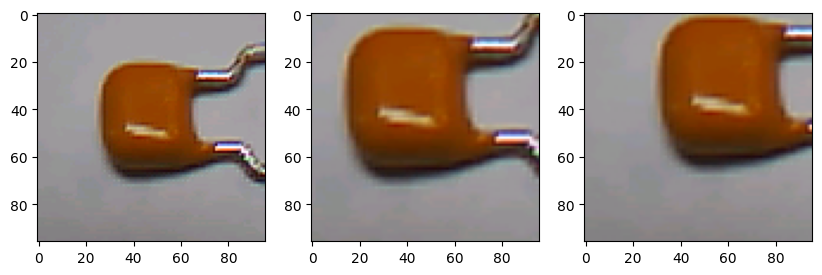

In [16]:
### Scale and randomly crop

# Choose a scale/crop factor (must be >= 1.0)
scale_factor = 1.3

# Create scaled images (e.g. make the image bigger)
img_scaled = skimage.transform.rescale(img, 
                                       scale=scale_factor, 
                                       anti_aliasing=True, 
                                       channel_axis=-1,
                                       preserve_range=True)

# Make sure new scaled image is also 8-bit integer values
img_scaled = img_scaled.astype(np.uint8)

# Get height and width of scaled image
s_h = img_scaled.shape[0]
s_w = img_scaled.shape[1]

# Randomly choose start of crop point
crop_y = round(random.random() * (s_h - height))
crop_x = round(random.random() * (s_w - width))

# Crop scaled image
scale_1 = img_scaled[crop_y:(crop_y + height), crop_x:(crop_x + width), :]

# Randomly choose a different crop point
crop_y = round(random.random() * (s_h - height))
crop_x = round(random.random() * (s_w - width))

# Crop scaled image
scale_2 = img_scaled[crop_y:(crop_y + height), crop_x:(crop_x + width), :]

# Show the original and the transforms
figs, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(scale_1, vmin=0, vmax=255)
axs[2].imshow(scale_2, vmin=0, vmax=255)

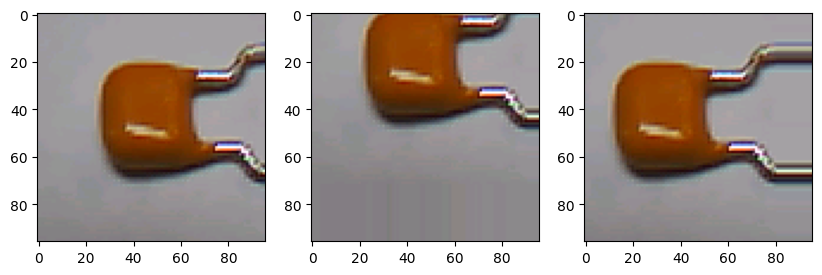

In [17]:
### Translation

# Choose random amount to translate (up to 1/4 image width, height) in either direction
tr_y = round((0.5 - random.random()) * (height / 2))
tr_x = round((0.5 - random.random()) * (width / 2))

# Perform translation to create new image
translation = skimage.transform.AffineTransform(translation=(tr_y, tr_x))
tr_1 = skimage.transform.warp(img, translation, mode='edge', preserve_range=True)
tr_1 = tr_1.astype(np.uint8)

# Choose a new random amount to translate (up to 1/4 image width, height) in either direction
tr_y = round((0.5 - random.random()) * (height / 2))
tr_x = round((0.5 - random.random()) * (width / 2))

# Perform translation to create new image
translation = skimage.transform.AffineTransform(translation=(tr_y, tr_x))
tr_2 = skimage.transform.warp(img, translation, mode='edge', preserve_range=True)
tr_2 = tr_2.astype(np.uint8)

# Show the original and the transforms
figs, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(tr_1, vmin=0, vmax=255)
axs[2].imshow(tr_2, vmin=0, vmax=255)

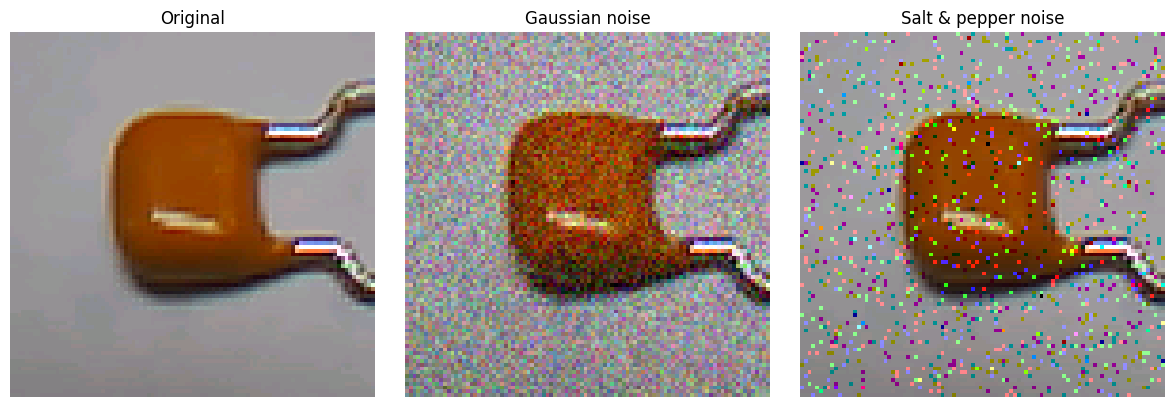

In [24]:
### Noise

# Add random Gaussian noise
noise_1 = util.random_noise(img, mode='gaussian', rng=SEED)
noise_1 = (noise_1 * 255).astype(np.uint8)

# Add random "salt and pepper" noise
noise_2 = util.random_noise(img, mode='s&p', rng=SEED)
noise_2 = (noise_2 * 255).astype(np.uint8)

# Show the original and the transforms
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(img, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original")

axs[1].imshow(noise_1, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Gaussian noise")

axs[2].imshow(noise_2, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Salt & pepper noise")

for ax in axs:
    ax.axis("off")

plt.tight_layout()
plt.show()